# Initial Conditions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm



In [2]:
file_path = 'SSHDYN_2017_12.nc'
ds = xr.open_dataset(file_path)
lon = np.array(ds['longitude'][:])
lat = np.array(ds['latitude'][:])
SSH = np.array(ds['SSHDYN'][:])

lon_Shifted = []
for l in lon: 
    if l >= 0:
        lon_Shifted.append(l)
    elif l <0:
        lon_Shifted.append(l + 360)

SSH = SSH[0,:,:]

Lon, Lat = np.meshgrid(lon_Shifted, lat)

ds.close()
print(np.shape(SSH))

#ds

(360, 720)


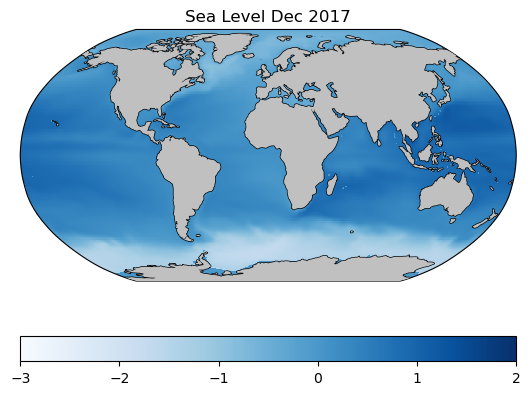

In [3]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson())

plt.pcolormesh(lon, lat, SSH, vmin=-3, vmax=2, cmap='Blues',
               transform=ccrs.PlateCarree(), shading='auto')
plt.colorbar(orientation = 'horizontal')


# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# format the axes
plt.title('Sea Level Dec 2017')
plt.show()

In [4]:
delX = 1/4
delY = 1/4
xgOrigin = 115
ygOrigin = -23
n_rows = 352
n_cols = 512

xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)
print('Double check shape:', np.shape(xc),np.shape(yc))

Double check shape: (512,) (352,)


In [5]:
# interpolate the gebco data onto the model grid
Model_SSH = griddata(np.column_stack([Lon.ravel(),Lat.ravel()]), SSH.ravel(), (XC, YC), method='nearest')
print(np.shape(Model_SSH))


(352, 512)


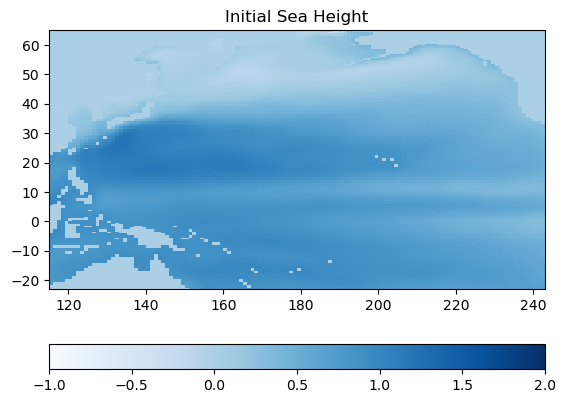

In [6]:
fig = plt.figure()
C = plt.pcolormesh(XC, YC, Model_SSH, vmin=-1, vmax=2, cmap='Blues')
plt.colorbar(C, orientation = 'horizontal')
plt.title('Initial Sea Height')

plt.show()

#### Example of Starting Conditions at t=0

the following figure is an example of the initial input for a tsunami simulation, originating from a large earthquake above the northern coast of Papua New Guinea on the convergent AU-PA fault.

In [7]:
Model_SSH[95,100] = 2

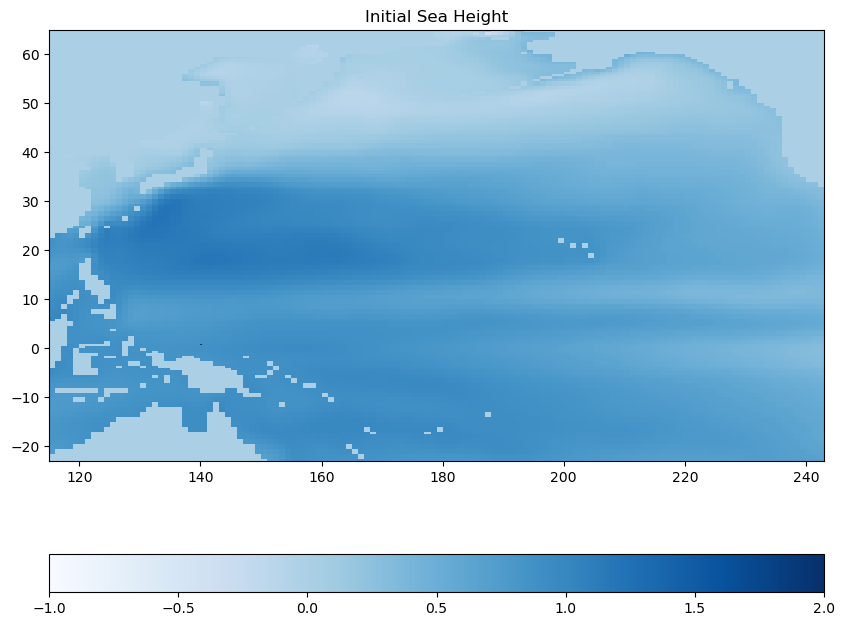

In [8]:
fig = plt.figure(figsize =(10, 8))
C = plt.pcolormesh(XC, YC, Model_SSH, vmin=-1, vmax=2, cmap='Blues')
plt.colorbar(C, orientation = 'horizontal')
plt.title('Initial Sea Height')

plt.show()

It is hard to see but there is one dark pixel at 140,0 on the figure which is where the earthquake dispaced water which will then propagate across the ocean